## Burger Star Dataset

Pada Dataset Burger Star akan dilakukan machine learning dengan metode Asosiasi untuk mengetahui hubungan erat antar atribut yang mana ketika pelanggan memilih burger A maka akan diikuti oleh pemilihan minuman B atau sebaliknya. Analisis tersebut ditujukan untuk memberikan rekomendasi "paket menu" yang diminati oleh pelanggan. Dimana dengan adanya rekomendasi tersebut diharapkan produktivitas penjualan outlet Burger Star akan meningkat sehingga dapat berkontribusi dalam peningkatan profit Burger Star secara umum. <br>

### Import dan Install Libraries

Melakukan instalasi seluruh libraries yang dibutuhkan untuk melakukan analisis Asosiasi.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install apyori

In [3]:
from apyori import apriori

### Load Dataset Burger Star

In [60]:
df = pd.read_csv('Static Dataset Transaction - Burger Star (Outlet A) .csv')
df.head(10)

,Timestamp,Type Burger,Code Burger,Amount Burger,Type Drink,Code Drink,Amount Drink,Gender,Payment
0,10:01,Beef burger,1,6,Mineral water,1,3,1,DANA
1,10:04,Cheese burger,3,12,Coke,2,10,0,DANA
2,10:05,Double cheese burger,4,10,Mineral water,1,5,0,LINK AJA
3,10:06,Chicken burger,2,9,Coffe,3,9,0,DANA
4,10:07,Cheese burger,3,11,Coke,2,3,1,DANA
5,10:08,Double cheese burger,4,8,Mineral water,1,4,1,DANA
6,10:09,Beef burger,1,7,Mineral water,1,7,1,GOPAY
7,10:11,Beef burger,1,6,Mineral water,1,3,1,TUNAI
8,10:12,Double cheese burger,4,5,Coffe,3,2,0,TUNAI
9,10:16,Chicken burger,2,9,Coffe,3,9,0,TUNAI


### Data Type, Description and Dimension Dataset

In [5]:
df.shape

(312, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 9 columns):
Timestamp        312 non-null object
Type Burger      312 non-null object
Code Burger      312 non-null int64
Amount Burger    312 non-null int64
Type Drink       312 non-null object
Code Drink       312 non-null int64
Amount Drink     312 non-null int64
Gender           312 non-null int64
Payment          312 non-null object
dtypes: int64(5), object(4)
memory usage: 22.0+ KB


In [7]:
df.describe()

,Code Burger,Amount Burger,Code Drink,Amount Drink,Gender
count,312.000000,312.00000,312.000000,312.000000,312.000000
mean,2.250000,6.25000,1.637821,3.913462,0.451923
std,1.173803,3.45969,1.045698,2.960981,0.498483
min,1.000000,1.00000,0.000000,0.000000,0.000000
25%,1.000000,3.00000,1.000000,2.000000,0.000000
50%,2.000000,6.00000,2.000000,3.000000,0.000000
75%,3.000000,9.00000,3.000000,5.000000,1.000000
max,4.000000,12.00000,3.000000,10.000000,1.000000


### Missing Value Detection

In [8]:
df.isnull().sum()

Timestamp        0
Type Burger      0
Code Burger      0
Amount Burger    0
Type Drink       0
Code Drink       0
Amount Drink     0
Gender           0
Payment          0
dtype: int64

Dari dataframe Burger Star terlihat bahwa dataset tersebut terdiri atas 312 datum/tupple dan 9 kolom/features. Dari informasi dataframe didapat bahwa pada dataset tersebut hanya terdiri atas dua tipe, yaitu integer dan string/objek. Kemudian dengan adanya missing value detection diketahui bahwa data tersebut sudah rapih dan tidak ditemukan adanya missing value. <br>

### Outliers Detection

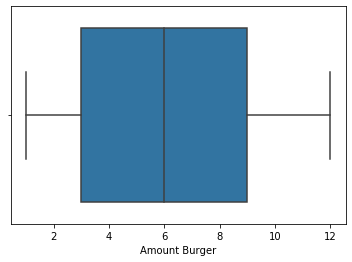

In [9]:
sns.boxplot(x=df['Amount Burger'])

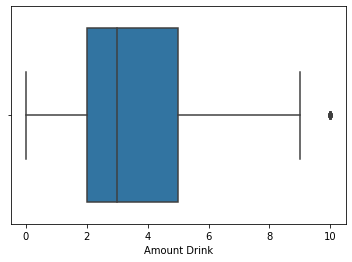

In [10]:
sns.boxplot(x=df['Amount Drink'])

Dari kedua boxplot di atas terlihat bahwa untuk features 'Amount Burger' tidak ditemukan adanya outliers. Sementara pada features 'Amount Drink' ditemukan ada satu outliers bernilai 10 dari nilai maksimum 9. Dikarenakan nilai outliers hanya satu dan nilainya tidak terlalu jauh dari maksimum maka kami memutuskan untuk tetap menggunakan informasi tersebut.

### Some Features Distribution by values counts

In [37]:
df['Type Burger'].value_counts()

Beef burger             116
Chicken burger           71
Double cheese burger     69
Cheese burger            56
Name: Type Burger, dtype: int64

Dari output di atas terlihat bahwa mayoritas pelanggan lebih tertarik untuk memesan beef burger daripada burger lainnya.

In [38]:
df['Type Drink'].value_counts()

Mineral water    109
Coffe             88
Coke              69
None              46
Name: Type Drink, dtype: int64

Dari output di atas terlihat bahwa mayoritas pelanggan lebih tertarik untuk memesan mineral water daripada minuman lainnya.

In [39]:
df['Payment'].value_counts()

LINK AJA    67
GOPAY       65
DANA        64
TUNAI       64
OVO         52
Name: Payment, dtype: int64

Dari output di atas terlihat bahwa metode pembayaran yang dilakukan oleh pelanggan tersebar secara rata dari kelima fitur yang disediakan. Namun dapat dikatakan bahwa mayoritas pelanggan melakukan pembayaran dengan uang elektronik. Hal ini dapat terjadi dengan anggapan bahwa fitur uang elektronik lebih praktis dan lebih sering mengadakan event promo. Sehingga mayoritas pelanggan tertarik untuk menggunakan fitur uang elektronik.

In [40]:
df['Gender'].value_counts()

0    171
1    141
Name: Gender, dtype: int64

Dari output di atas terlihat bahwa pelanggan kode 0 (wanita) lebih banyak daripada pelanggan kode 1 (pria).

### Linear Regression

Selanjutnya akan dilihat linear regression antara kumulatif penjualan chicken burger terhadap waktu. Dataset yang digunakan sudah dimodifikasi dengan menambahkan kolom kumulatif penjualan chicken burger.

In [11]:
dataset=pd.read_csv('dataset.csv')

In [12]:
dataset['Hour']=dataset['Timestamp'].str[:2]
dataset['Minute']=dataset['Timestamp'].str[3:]
dataset.head()

,Timestamp,Type Burger,Code Burger,Amount Burger,Type Drink,Code Drink,Amount Drink,Gender,Payment,sumchicken,Hour,Minute
0,10:01,Beef burger,1,6,Mineral water,1,3,1,DANA,0,10,01
1,10:04,Cheese burger,3,12,Coke,2,10,0,DANA,0,10,04
2,10:05,Double cheese burger,4,10,Mineral water,1,5,0,LINK AJA,0,10,05
3,10:06,Chicken burger,2,9,Coffe,3,9,0,DANA,2,10,06
4,10:07,Cheese burger,3,11,Coke,2,3,1,DANA,5,10,07


In [13]:
dataset.tail()

,Timestamp,Type Burger,Code Burger,Amount Burger,Type Drink,Code Drink,Amount Drink,Gender,Payment,sumchicken,Hour,Minute
64,11:51,Double cheese burger,4,8,Mineral water,1,4,1,LINK AJA,105,11,51
65,11:52,Beef burger,1,7,Mineral water,1,7,1,TUNAI,105,11,52
66,11:53,Chicken burger,2,11,None,0,0,0,DANA,116,11,53
67,11:58,Beef burger,1,10,Mineral water,1,3,1,DANA,126,11,58
68,11:59,Beef burger,1,9,Coffe,3,2,1,LINK AJA,135,11,59


In [14]:
# Ubah hour and min to int
#dataset2['Hour'] = dataset2['Hour'].astype(int)
#dataset2['Minute'] = dataset2['Minute'].astype(int)
#dataset2.head()

#merging hour and minute
dataset['time'] = dataset[['Hour', 'Minute']].apply(lambda x: ''.join(x), axis=1)
dataset['time'] = dataset['time'].astype(int)
dataset.head()

,Timestamp,Type Burger,Code Burger,Amount Burger,Type Drink,Code Drink,Amount Drink,Gender,Payment,sumchicken,Hour,Minute,time
0,10:01,Beef burger,1,6,Mineral water,1,3,1,DANA,0,10,01,1001
1,10:04,Cheese burger,3,12,Coke,2,10,0,DANA,0,10,04,1004
2,10:05,Double cheese burger,4,10,Mineral water,1,5,0,LINK AJA,0,10,05,1005
3,10:06,Chicken burger,2,9,Coffe,3,9,0,DANA,2,10,06,1006
4,10:07,Cheese burger,3,11,Coke,2,3,1,DANA,5,10,07,1007


In [15]:
# Independent Variable (X) Code Burger
# Dependent Variable (y) amount Burger
X = dataset.iloc[:,-1].values
y = dataset.iloc[:,9].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)

# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

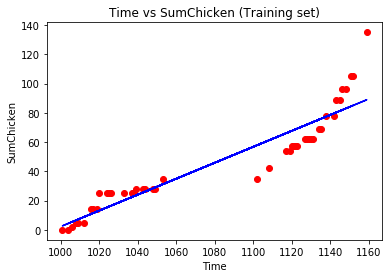

In [16]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Time vs SumChicken (Training set)')
plt.xlabel('Time')
plt.ylabel('SumChicken')
plt.show()

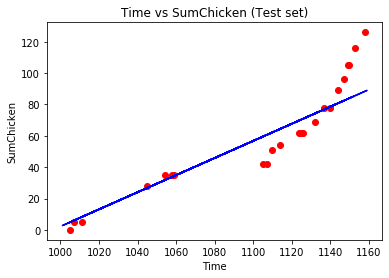

In [17]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Time vs SumChicken (Test set)')
plt.xlabel('Time')
plt.ylabel('SumChicken')
plt.show()

In [18]:
# Finding r2_score
from sklearn.metrics import r2_score
r2score = r2_score(y_test, y_pred)
print('Nilai R2 dari linear regression : ', r2score)

Nilai R2 dari linear regression :  0.8315133068021473


In [19]:
#sumchicken until 12.00
y_pred = y_pred[-1]
print('Prediksi nilai kumulatif dari banyaknya penjualan chicken burger sampai dengan pukul 12:00 : ', y_pred)

Prediksi nilai kumulatif dari banyaknya penjualan chicken burger sampai dengan pukul 12:00 :  [78.52580886]


### Polynomial Regression

In [61]:
# Menambahkan kolom Hour dan Minute pada datasert Burger Star
df['Hour']=df['Timestamp'].str[:2]
df['Minute']=df['Timestamp'].str[3:]
df.head()

,Timestamp,Type Burger,Code Burger,Amount Burger,Type Drink,Code Drink,Amount Drink,Gender,Payment,Hour,Minute
0,10:01,Beef burger,1,6,Mineral water,1,3,1,DANA,10,01
1,10:04,Cheese burger,3,12,Coke,2,10,0,DANA,10,04
2,10:05,Double cheese burger,4,10,Mineral water,1,5,0,LINK AJA,10,05
3,10:06,Chicken burger,2,9,Coffe,3,9,0,DANA,10,06
4,10:07,Cheese burger,3,11,Coke,2,3,1,DANA,10,07


In [62]:
# Merging hour and minute
df['Time'] = df[['Hour', 'Minute']].apply(lambda x: ''.join(x), axis=1)
df['Time'] = df['Time'].astype(int)
df.head()

,Timestamp,Type Burger,Code Burger,Amount Burger,Type Drink,Code Drink,Amount Drink,Gender,Payment,Hour,Minute,Time
0,10:01,Beef burger,1,6,Mineral water,1,3,1,DANA,10,01,1001
1,10:04,Cheese burger,3,12,Coke,2,10,0,DANA,10,04,1004
2,10:05,Double cheese burger,4,10,Mineral water,1,5,0,LINK AJA,10,05,1005
3,10:06,Chicken burger,2,9,Coffe,3,9,0,DANA,10,06,1006
4,10:07,Cheese burger,3,11,Coke,2,3,1,DANA,10,07,1007


In [66]:
#Perhitungan Akumulasi Chicken Burger
label=[]
sum=0
j=0
k=0
while j<22:
    for i in df['Type Burger']:
        if i =='Chicken burger':
            sum=sum+float(df.loc[k,'Amount Burger'])
            label.append(sum)
            k=k+1
            j=float(df.loc[k,'Time'])
        else:
            sum=sum
            k=k+1
            
akumulasi_chickenburger=pd.Series(label)
akumulasi_chickenburger.head()

0     9.0
1    18.0
2    29.0
3    32.0
4    39.0
dtype: float64

In [91]:
waktu = df[df['Type Burger']=='Chicken burger'].Time
tabel_distribusi_chickenburger = pd.DataFrame(list(zip(waktu,Akumulasi_chickenburger)),columns=['Time','Akumulasi'])
tabel_distribusi_chickenburger.head()

,Time,Akumulasi
0,1006,9.0
1,1016,18.0
2,1020,29.0
3,1039,32.0
4,1053,39.0


In [92]:
chickenburgerpagi = tabel_distribusi_chickenburger[tabel_distribusi_chickenburger.Time < 1200]
chickenburgerpagi

,Time,Akumulasi
0,1006,9.0
1,1016,18.0
2,1020,29.0
3,1039,32.0
4,1053,39.0
5,1105,46.0
6,1110,55.0
7,1114,58.0
8,1120,61.0
9,1124,66.0


In [74]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Independent Variable (X) Code Burger
# Dependent Variable (y) amount Burger
X = chickenburgerpagi.iloc[:,0:1].values
y = chickenburgerpagi.iloc[:,-1].values


# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

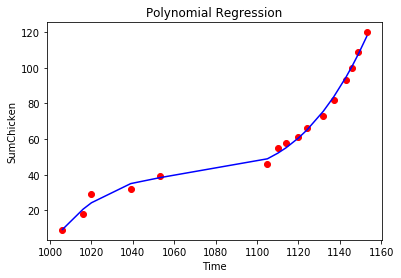

In [75]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Time')
plt.ylabel('SumChicken')
plt.show()

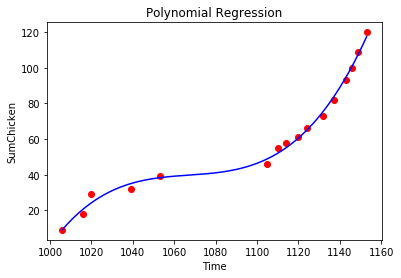

In [76]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Time')
plt.ylabel('SumChicken')
plt.show()

In [98]:
#sumchicken until 11.00
y_pred11 = lin_reg_2.predict(poly_reg.fit_transform(X))[4]
print('Nilai prediksi banyaknya chicken burger yang terjual sampai dengan pukul 11.00 : ', y_pred11)

Nilai prediksi banyaknya chicken burger yang terjual sampai dengan pukul 11.00 :  38.32093608190189


In [97]:
#sumchicken until 12.00
y_pred12 = lin_reg_2.predict(poly_reg.fit_transform(X))[-1]
print('Nilai prediksi banyaknya chicken burger yang terjual sampai dengan pukul 12.00 : ', y_pred12)

Nilai prediksi banyaknya chicken burger yang terjual sampai dengan pukul 12.00 :  117.68867102483637


### Association Method

In [31]:
df_acc = df.drop(['Timestamp','Code Burger','Amount Burger','Code Drink','Amount Drink','Gender','Payment','Jam'],axis=1)

In [32]:
df_acc.head(10)

,Type Burger,Type Drink
0,Beef burger,Mineral water
1,Cheese burger,Coke
2,Double cheese burger,Mineral water
3,Chicken burger,Coffe
4,Cheese burger,Coke
5,Double cheese burger,Mineral water
6,Beef burger,Mineral water
7,Beef burger,Mineral water
8,Double cheese burger,Coffe
9,Chicken burger,Coffe


Seperti yang telah disebutkan di awal bahwa metode asosiasi yang dilakukan adalah untuk mengetahui hubungan erat antar atribut yang mana ketika pelanggan memilih burger A maka akan diikuti oleh pemilihan minuman B atau sebaliknya. Analisis tersebut ditujukan untuk memberikan rekomendasi "paket menu" yang diminati oleh pelanggan. Sehingga dilakukan eliminasi features yang tidak dibutuhkan dari data set burger star. Pada kasus ini kami menggunakan features Type Burger dan Type Drink saja.

In [33]:
transactions = []
for i in range(0, 312):
    transactions.append([str(df_acc.values[i,j]) for j in range(0,2)])
transactions

[['Beef burger', 'Mineral water'],
 ['Cheese burger', 'Coke'],
 ['Double cheese burger', 'Mineral water'],
 ['Chicken burger', 'Coffe'],
 ['Cheese burger', 'Coke'],
 ['Double cheese burger', 'Mineral water'],
 ['Beef burger', 'Mineral water'],
 ['Beef burger', 'Mineral water'],
 ['Double cheese burger', 'Coffe'],
 ['Chicken burger', 'Coffe'],
 ['Cheese burger', 'Coke'],
 ['Beef burger', 'Mineral water'],
 ['Chicken burger', 'None'],
 ['Beef burger', 'Mineral water'],
 ['Beef burger', 'Mineral water'],
 ['Beef burger', 'Mineral water'],
 ['Beef burger', 'Mineral water'],
 ['Beef burger', 'Coffe'],
 ['Beef burger', 'Coffe'],
 ['Chicken burger', 'Coffe'],
 ['Cheese burger', 'Coke'],
 ['Double cheese burger', 'Mineral water'],
 ['Double cheese burger', 'Coffe'],
 ['Double cheese burger', 'Mineral water'],
 ['Beef burger', 'None'],
 ['Chicken burger', 'None'],
 ['Cheese burger', 'Coke'],
 ['Double cheese burger', 'Mineral water'],
 ['Beef burger', 'Mineral water'],
 ['Double cheese burger',

Mendefinisikan Type Burger dan Type Drink yang disimpan pada array transactions.

In [34]:
# Training Apriori on the dataset

from apyori import apriori
rules = apriori(transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 1.1, min_length = 1)

Mendefinisikan ketentuan dari asosiasi yang akan dibuat untuk dataset Burger Star. Dari code diatas terdapat beberapa definisi untuk batasa yang digunakan pada metode asosiasi, meliputi:
1. support(B) = banyaknya kejadian B / total seluruh kejadian
2. confidence(A -> B) = banyaknya kejadian A dan B / banyaknya kejadian A
3. lift(A -> B) = confidence(A -> B) / support(B)

<br> Kemudian dari definisi tersebut kami tentukan batasan yang digunakan adalah sbb:
1. minimum support = 0.003
2. minimum confidence = 0.2
2. minimum lift = 1.1

<br> Selanjutnya data pada array transaction diproses oleh rules yang telah ditentukan.

In [94]:
# Visualising the results
results = list(rules)
for i in results:
    print(i)

Data yang telah diproses dengan "rules" disimpan dalam bentuk list pada variabel result. Kemudian dilakukan code seperti di bawah guna menampilkan hasil asosiasi agar lebih mudah untuk dibaca. Hasil yang ditampilkan berurutan dari nilai support terbesar sampai terkecil sesuai dengan rentang nilai yang telah ditetapkan.

In [93]:
for item in results:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: Mineral water -> Beef burger
Support: 0.20512820512820512
Confidence: 0.5517241379310345
Lift: 1.579247073710851
Rule: Cheese burger -> Coke
Support: 0.1794871794871795
Confidence: 1.0
Lift: 4.521739130434783
Rule: Chicken burger -> Coffe
Support: 0.11538461538461539
Confidence: 0.5070422535211268
Lift: 1.7976952624839948
Rule: Chicken burger -> None
Support: 0.11217948717948718
Confidence: 0.49295774647887325
Lift: 3.3435394978567055
Rule: Double cheese burger -> Coffe
Support: 0.07692307692307693
Confidence: 0.27272727272727276
Lift: 1.2332015810276682
Rule: Double cheese burger -> Mineral water
Support: 0.14423076923076922
Confidence: 0.6521739130434783
Lift: 1.8667730355005985


Dari output association di atas maka akan dipilih rekomendasi promo untuk paket makanan coffe dan double cheese burger. Dikarena nilai confidence dari urutan/pasangan makanan dan minuman tersebut rendah. Sehingga untuk meningkatan produktivitas penjualanannya akan dilakukan rekomendasi promo pada waktu tertentu.